In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = 'Indian_housing_Delhi_data.csv'
df = pd.read_csv(file_path)

def extract_sqft(val):
    match = re.search(r'(\d+[,.]?\d*)', str(val))
    return float(match.group().replace(',', '')) if match else None

df['house_size_num'] = df['house_size'].apply(extract_sqft)
df['numBathrooms'] = pd.to_numeric(df['numBathrooms'], errors='coerce').fillna(1)

df = df.dropna(subset=['price', 'house_size_num', 'latitude', 'longitude'])
df = df.reset_index(drop=True)
df.head()

In [ ]:
y = df['price']
X = df[['house_size_num', 'numBathrooms', 'latitude', 'longitude']].fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

In [ ]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, reg in models.items():
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MSE': mse, 'R2': r2, 'Coefficients': reg.coef_, 'Intercept': reg.intercept_}

results_df = pd.DataFrame(results).T[['MSE', 'R2']]
print('Comparison of Linear Regression Types:')
print(results_df)

# Optionally, show coefficients for each model
for name, vals in results.items():
    print(f'\n{name} coefficients: {vals["Coefficients"]}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices (Delhi)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, reg in models.items():
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MSE': mse, 'R2': r2, 'Coefficients': reg.coef_, 'Intercept': reg.intercept_}

results_df = pd.DataFrame(results).T[['MSE', 'R2']]
print('Comparison of Linear Regression Types:')
print(results_df)

for name, vals in results.items():
    print(f'\n{name} coefficients: {vals["Coefficients"]}')

In [ ]:
print(df.head())

indian_housing_delhi_data_df = df
indian_housing_delhi_data_df.head()

In [ ]:
# Analyze distribution of house prices and sizes
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(indian_housing_delhi_data_df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices (Delhi)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(indian_housing_delhi_data_df['house_size_num'], bins=30, kde=True)
plt.title('Distribution of House Sizes (Delhi)')
plt.xlabel('Size (sq ft)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Correlation analysis between features and price
corr = indian_housing_delhi_data_df[['price','house_size_num','numBathrooms','latitude','longitude']].corr()
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Features vs Price')
plt.show()

In [ ]:
# Scatter plot: House size vs Price
plt.figure(figsize=(8,5))
plt.scatter(indian_housing_delhi_data_df['house_size_num'], indian_housing_delhi_data_df['price'], alpha=0.6)
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.title('House Size vs Price')
plt.show()

# Scatter plot: Number of Bathrooms vs Price
plt.figure(figsize=(8,5))
plt.scatter(indian_housing_delhi_data_df['numBathrooms'], indian_housing_delhi_data_df['price'], alpha=0.6)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price')
plt.show()

# Boxplot: Price by House Type
plt.figure(figsize=(12,6))
sns.boxplot(x=indian_housing_delhi_data_df['house_type'], y=indian_housing_delhi_data_df['price'])
plt.xticks(rotation=45)
plt.title('Price Distribution by House Type')
plt.show()

# Geospatial plot: Price vs Location (Latitude & Longitude)
plt.figure(figsize=(10,6))
plt.scatter(indian_housing_delhi_data_df['longitude'], indian_housing_delhi_data_df['latitude'], c=indian_housing_delhi_data_df['price'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of House Prices in Delhi')
plt.show()

In [ ]:
# Analysis: House Size, Price, Security Deposit
plt.figure(figsize=(10,6))
sns.scatterplot(data=indian_housing_delhi_data_df, x='house_size_num', y='price', hue='SecurityDeposit', palette='Set2', alpha=0.7)
plt.title('House Size vs Price by Security Deposit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.legend(title='Security Deposit')
plt.show()

# Boxplot: Price by Security Deposit
plt.figure(figsize=(8,5))
sns.boxplot(x='SecurityDeposit', y='price', data=indian_housing_delhi_data_df)
plt.title('Price Distribution by Security Deposit')
plt.xlabel('Security Deposit')
plt.ylabel('Price')
plt.show()

In [ ]:
# Short summary: Average price by security deposit
avg_price_by_deposit = indian_housing_delhi_data_df.groupby('SecurityDeposit')['price'].mean()
print(avg_price_by_deposit)

In [ ]:
h_df = indian_housing_delhi_data_df

In [ ]:
x = h_df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
lr
X_test,y_test,X_train, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, 5000*0.8, 5000*0.2
y_pred = lr.predict(X_test)

In [34]:
import seaborn as sns
y_test

,house_size_num,numBathrooms,latitude,longitude
1501,450.0,1.0,28.493923,77.181168
2586,650.0,1.0,28.624125,77.081459
2653,6521.0,4.0,28.542767,77.206741
1055,820.0,2.0,28.492884,77.176552
705,1800.0,2.0,28.559410,77.062630
...,...,...,...,...
4711,900.0,2.0,28.710146,77.123581
2313,5896.0,4.0,28.677290,77.159302
3214,450.0,1.0,28.590473,77.048172
2732,5896.0,4.0,28.568350,77.272118


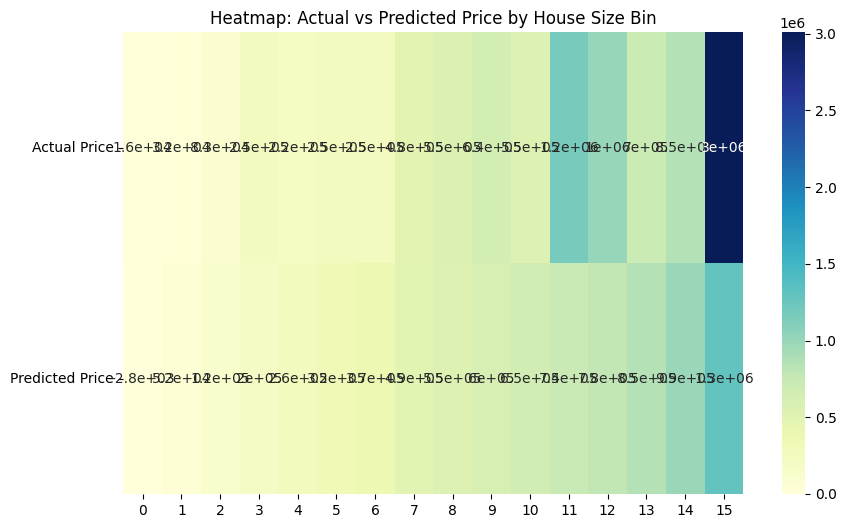

In [35]:
# Predict price based on house size using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_size = indian_housing_delhi_data_df[['house_size_num']].fillna(0)
y_price = indian_housing_delhi_data_df['price']
model.fit(X_size, y_price)
predicted_prices = model.predict(X_size)

# Add predictions to DataFrame
indian_housing_delhi_data_df['predicted_price'] = predicted_prices

# Heatmap: Actual vs Predicted Price by House Size
import numpy as np
import seaborn as sns
# Bin house sizes for heatmap
indian_housing_delhi_data_df['size_bin'] = pd.cut(indian_housing_delhi_data_df['house_size_num'], bins=20)
heatmap_data = indian_housing_delhi_data_df.groupby('size_bin')[['price','predicted_price']].mean()
heatmap_data = heatmap_data.reset_index()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data[['price','predicted_price']].T, annot=True, cmap='YlGnBu', cbar=True)
plt.yticks([0.5,1.5], ['Actual Price','Predicted Price'], rotation=0)
plt.title('Heatmap: Actual vs Predicted Price by House Size Bin')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raisin_df = pd.read_csv('Raisin_Dataset.csv')

display(raisin_df.head())

print('Shape:', raisin_df.shape)
print('Columns:', raisin_df.columns.tolist())
print(raisin_df.info())
print(raisin_df.describe())

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


Shape: (900, 8)
Columns: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class']
<class 'pandas.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    str    
dtypes: float64(5), int64(2), str(1)
memory usage: 56.4 KB
None
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.03

Missing values per column:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64
Class distribution:
Class
Kecimen    450
Besni      450
Name: count, dtype: int64


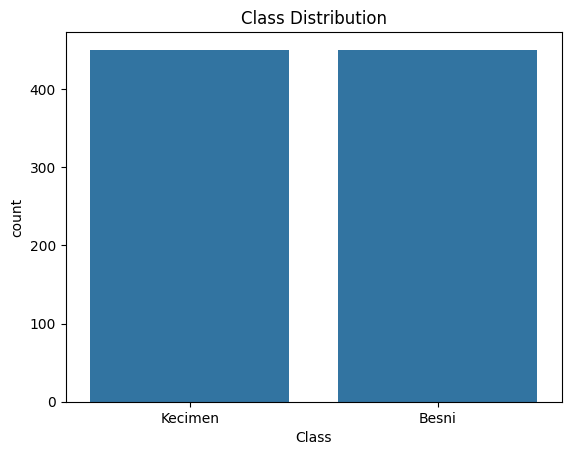

In [ ]:
print('Missing values per column:')
print(raisin_df.isnull().sum())

if 'Class' in raisin_df.columns:
    print('Class distribution:')
    print(raisin_df['Class'].value_counts())
    sns.countplot(x='Class', data=raisin_df)
    plt.title('Class Distribution')
    plt.show()
else:
    print('No Class column found for distribution plot.')

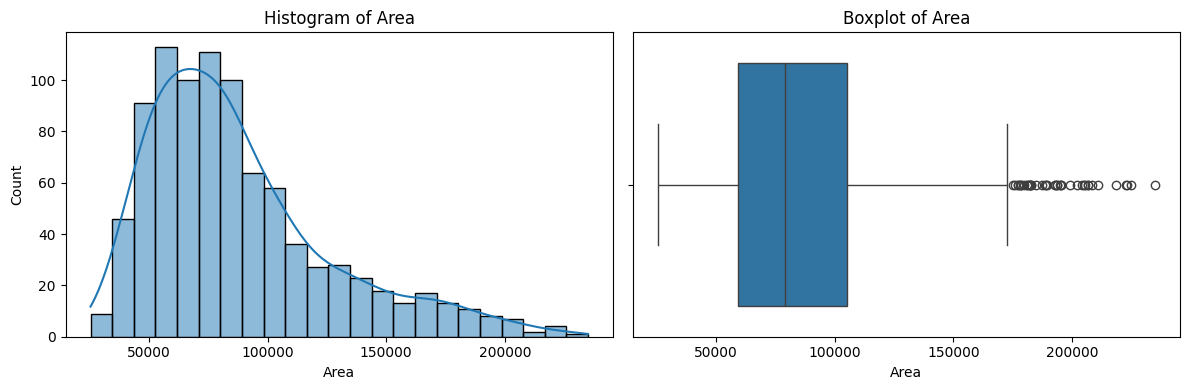

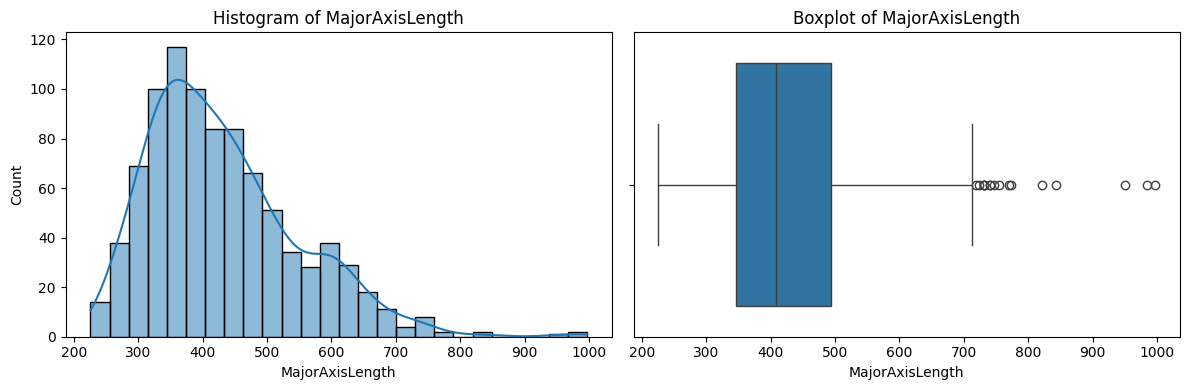

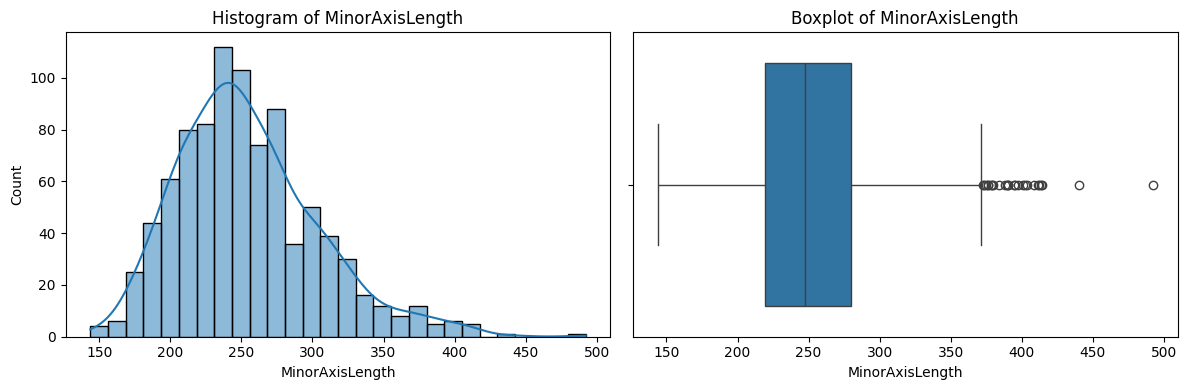

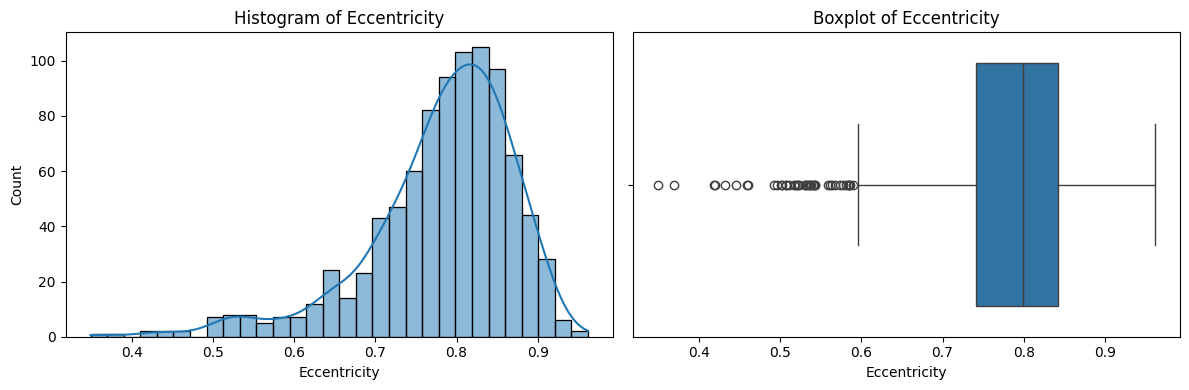

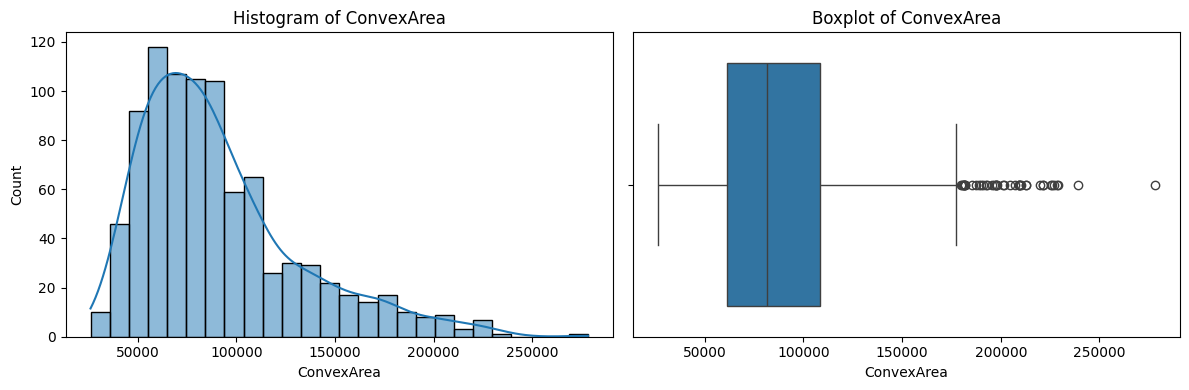

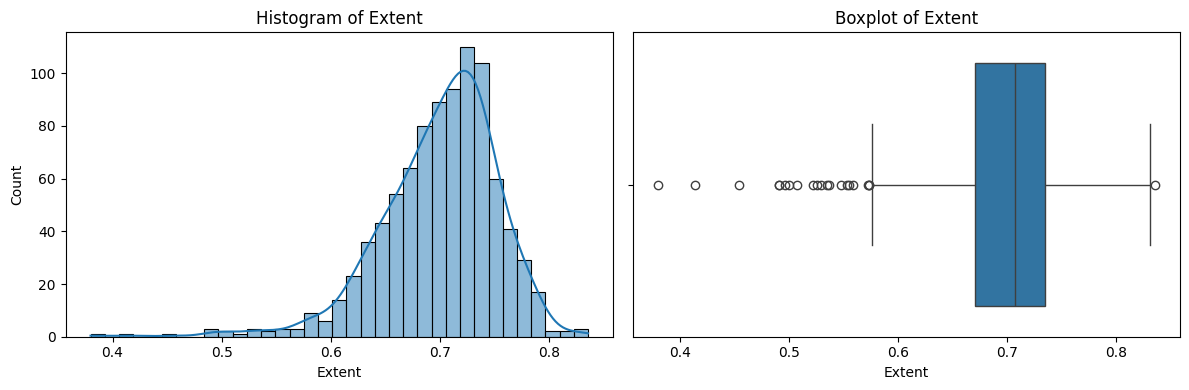

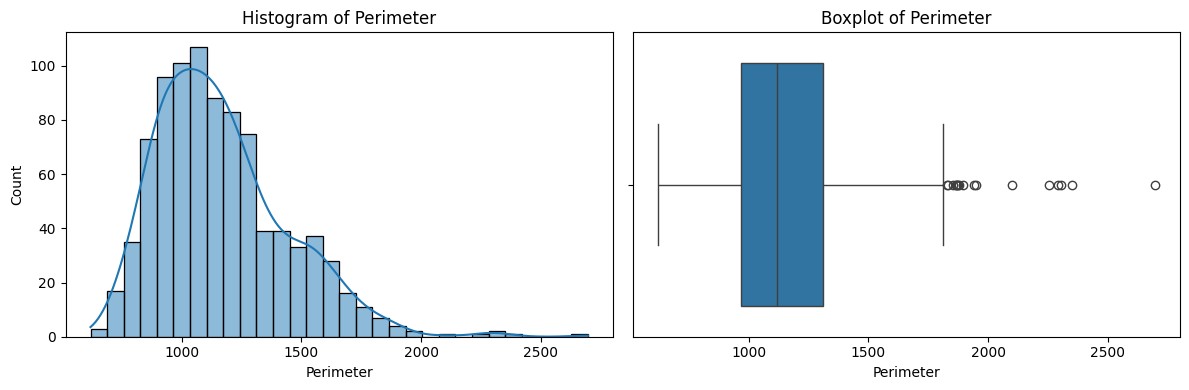

In [ ]:
num_cols = raisin_df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(raisin_df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=raisin_df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

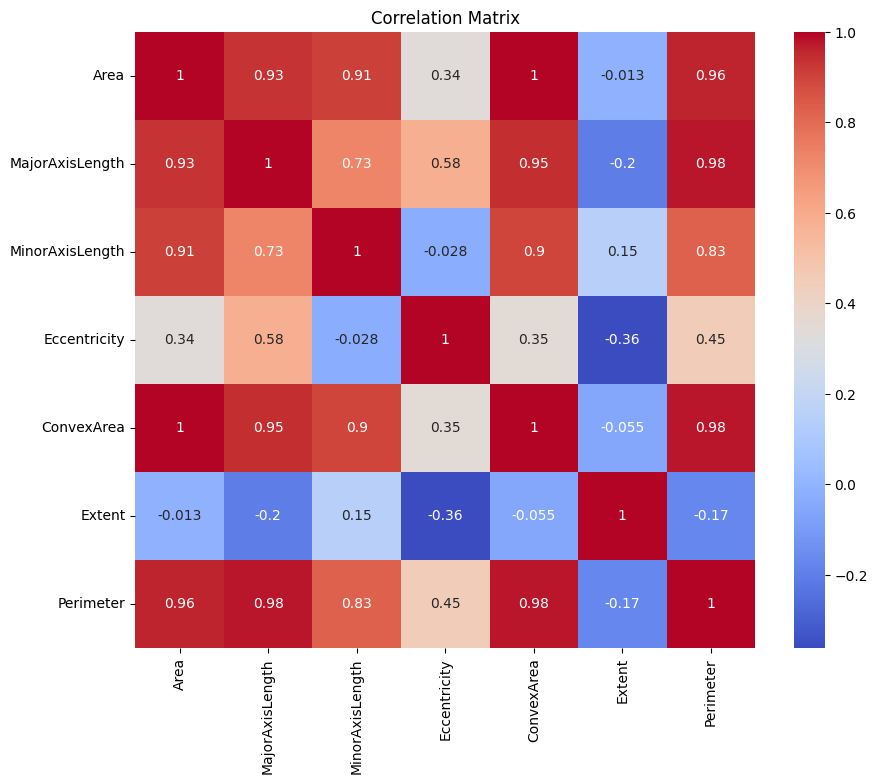

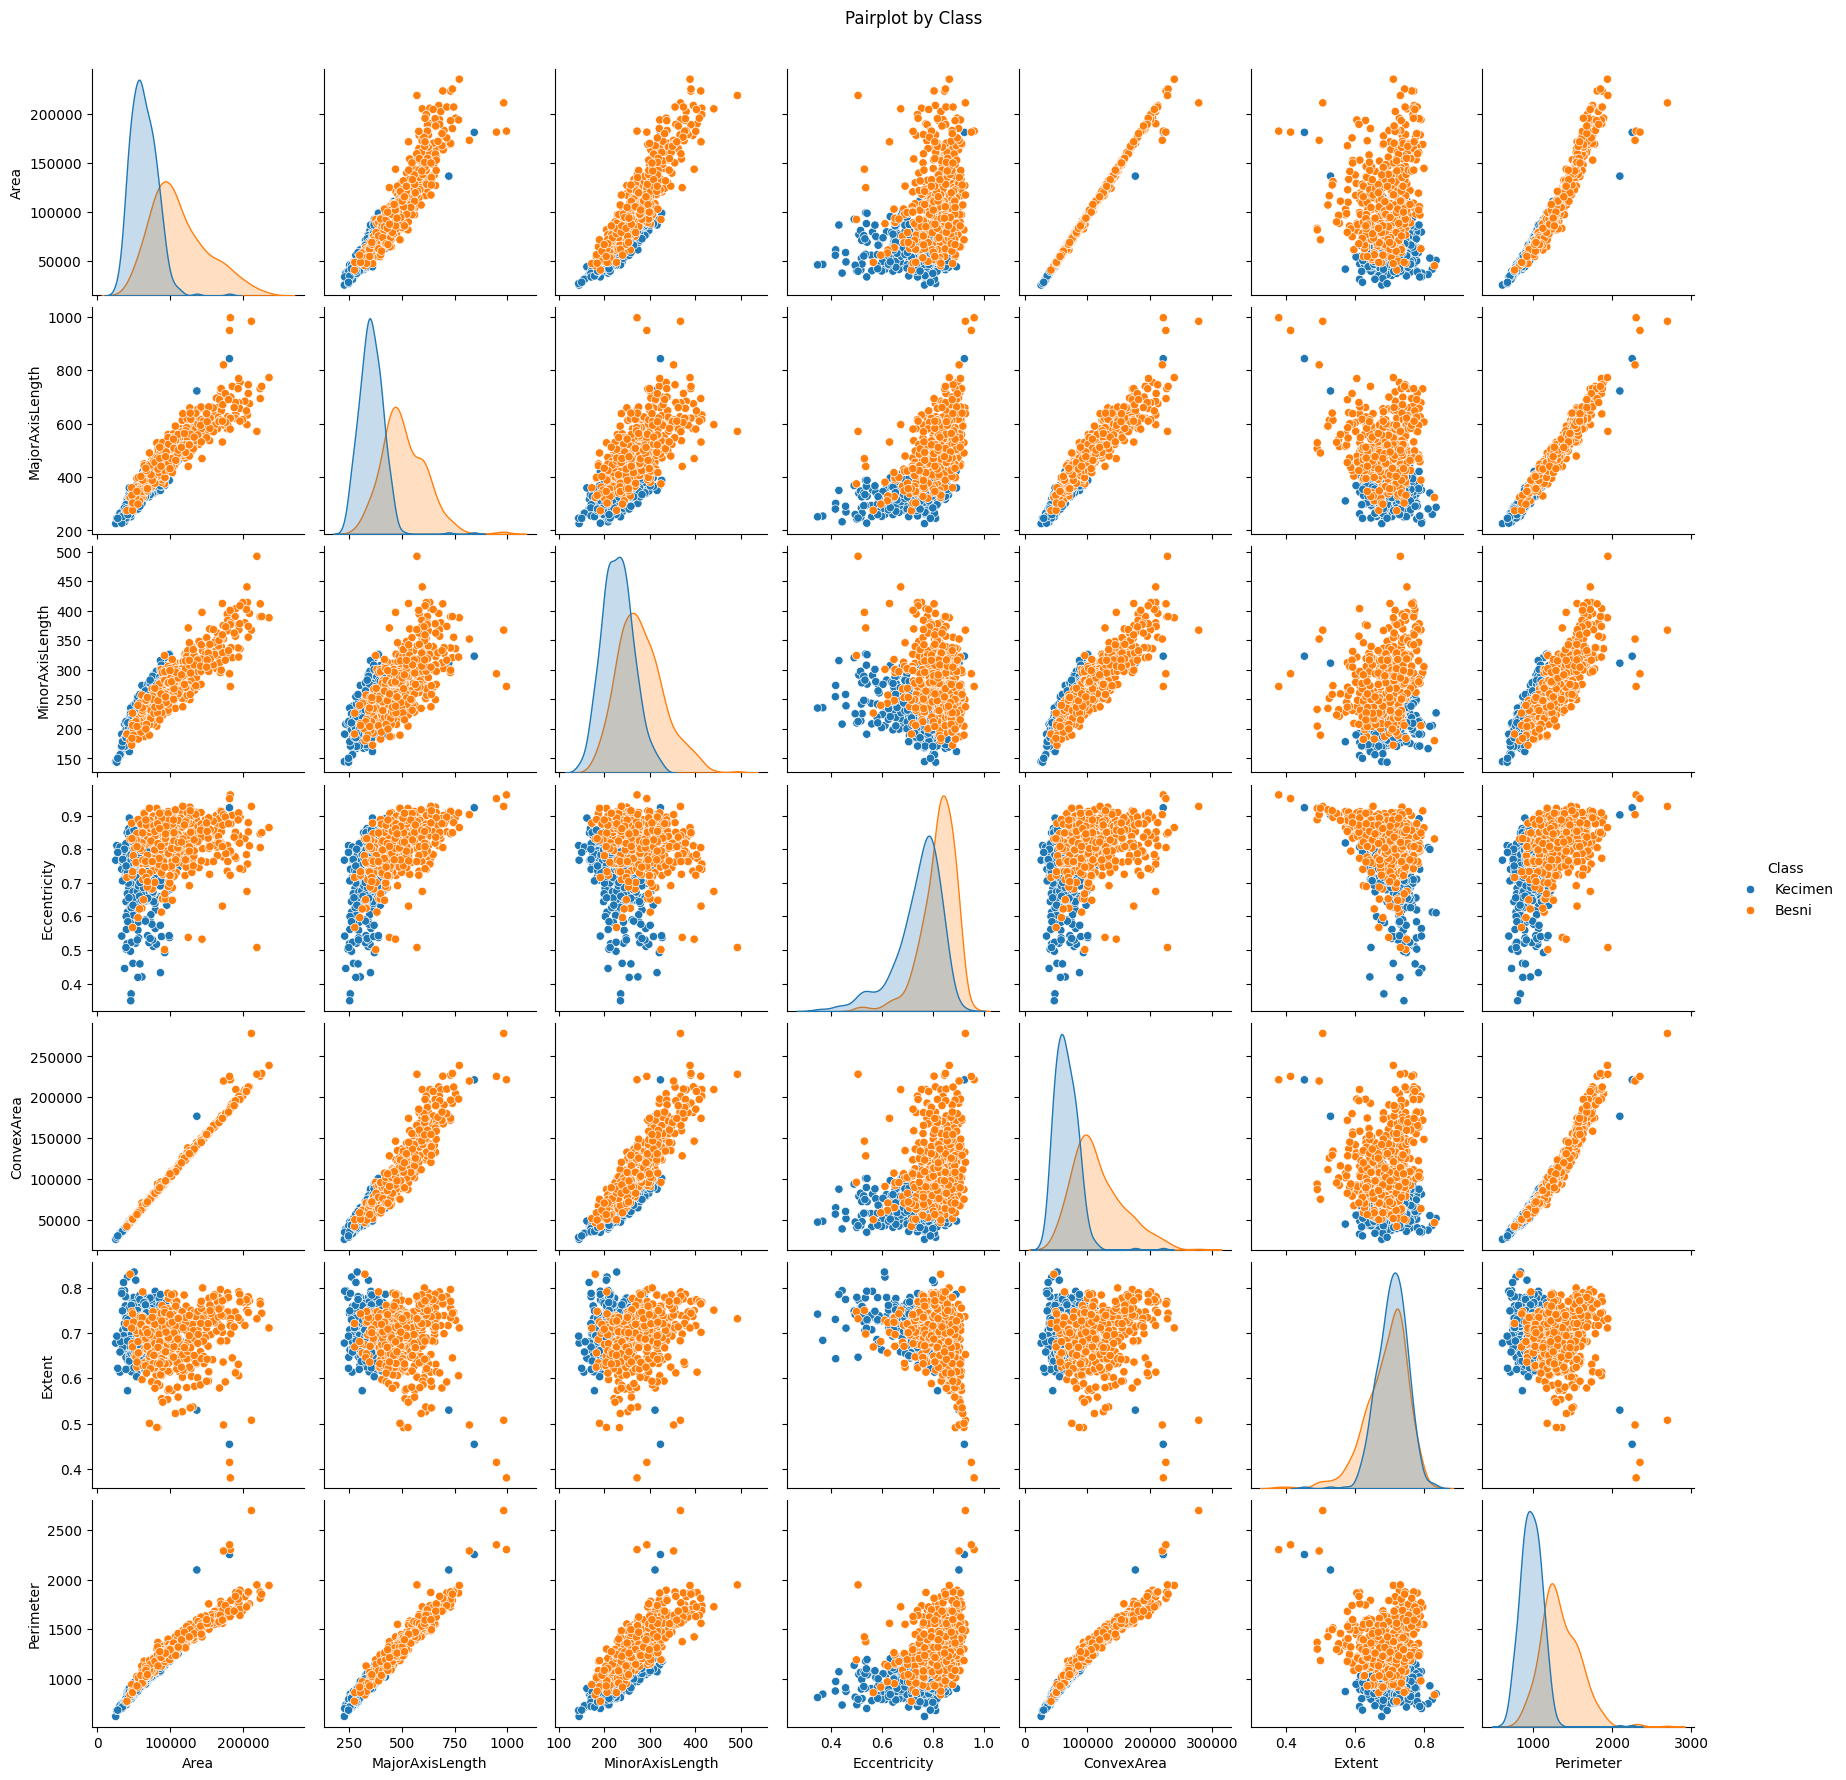

In [ ]:
corr = raisin_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if 'Class' in raisin_df.columns:
    sns.pairplot(raisin_df, hue='Class')
    plt.suptitle('Pairplot by Class', y=1.02)
    plt.show()

In [ ]:
from scipy.stats import ttest_ind

if 'Class' in raisin_df.columns:
    classes = raisin_df['Class'].unique()
    if len(classes) == 2:
        print('T-test between classes:')
        for col in num_cols:
            group1 = raisin_df[raisin_df['Class'] == classes[0]][col]
            group2 = raisin_df[raisin_df['Class'] == classes[1]][col]
            stat, p = ttest_ind(group1, group2)
            print(f'{col}: t-stat={stat:.2f}, p-value={p:.4f}')
    else:
        print('More than two classes, consider ANOVA.')
else:
    print('No Class column for statistical test.')

T-test between classes:
Area: t-stat=-24.04, p-value=0.0000
MajorAxisLength: t-stat=-27.28, p-value=0.0000
MinorAxisLength: t-stat=-17.44, p-value=0.0000
Eccentricity: t-stat=-14.62, p-value=0.0000
ConvexArea: t-stat=-24.03, p-value=0.0000
Extent: t-stat=4.69, p-value=0.0000
Perimeter: t-stat=-26.75, p-value=0.0000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

if 'Class' in raisin_df.columns:
    X = raisin_df.drop('Class', axis=1)
    y = raisin_df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
else:
    print('No Class column for classification.')

Classification Report:
              precision    recall  f1-score   support

       Besni       0.87      0.84      0.85        86
     Kecimen       0.86      0.88      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix:
[[72 14]
 [11 83]]


## Summary of Raisin Dataset Analysis
- Data loaded and explored for structure, missing values, and class distribution.
- Univariate analysis (histograms, boxplots) for all numeric features.
- Correlation matrix and pairplot for feature relationships.
- Statistical tests (t-test) to compare features by class.
- Simple machine learning classification with Random Forest.

You can run each cell step by step to see the outputs and visualizations.

In [9]:
df = pd.read_csv('Raisin_dataset.csv')


AttributeError: 'DataFrame' object has no attribute 'shpae'

In [11]:
# Logistic Regression on Raisin Dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fit logistic regression (if 'Class' column exists)
if 'Class' in raisin_df.columns:
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred_logreg = logreg.predict(X_test)
    print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
    print('Classification Report:')
    print(classification_report(y_test, y_pred_logreg))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred_logreg))
else:
    print('No Class column for logistic regression.')

Logistic Regression Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

       Besni       0.83      0.86      0.85        86
     Kecimen       0.87      0.84      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

Confusion Matrix:
[[74 12]
 [15 79]]


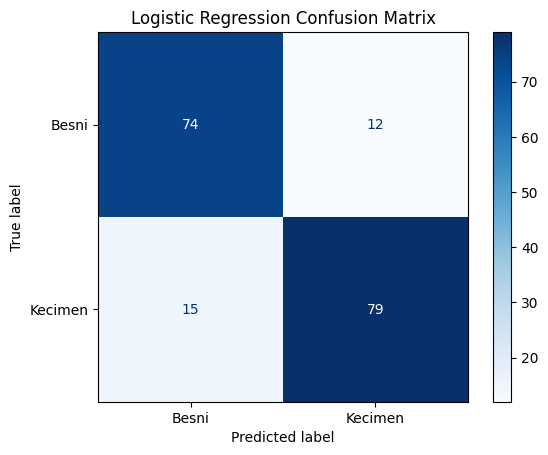

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

if 'Class' in raisin_df.columns:
    ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap='Blues', display_labels=logreg.classes_)
    plt.title('Logistic Regression Confusion Matrix')
    plt.show()
else:
    print('No Class column for confusion matrix visualization.')

In [13]:
# Cross-Validation for Logistic Regression
from sklearn.model_selection import cross_val_score

if 'Class' in raisin_df.columns:
    cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
    print('Logistic Regression Cross-Validation Accuracy Scores:', cv_scores)
    print('Mean CV Accuracy:', cv_scores.mean())
else:
    print('No Class column for cross-validation.')

# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

if 'Class' in raisin_df.columns:
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }
    grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
    grid.fit(X, y)
    print('Best Parameters:', grid.best_params_)
    print('Best Cross-Validation Accuracy:', grid.best_score_)
else:
    print('No Class column for hyperparameter tuning.')

# Analyze Misclassified Samples
if 'Class' in raisin_df.columns:
    misclassified = X_test[y_test != y_pred_logreg]
    print('Number of misclassified samples:', misclassified.shape[0])
    display(misclassified)
else:
    print('No Class column for misclassification analysis.')

Logistic Regression Cross-Validation Accuracy Scores: [0.86111111 0.85       0.85       0.86666667 0.81111111]
Mean CV Accuracy: 0.8477777777777777
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8666666666666666
Number of misclassified samples: 27


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
70,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245
827,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621
731,84383,403.909415,271.251509,0.740945,87629,0.674945,1140.605
110,81572,393.716176,265.814612,0.737687,84964,0.698271,1187.338
139,110616,461.144553,306.899065,0.746384,112150,0.752398,1252.875
168,92735,436.985567,271.578785,0.783428,94693,0.704122,1183.447
447,59589,383.571233,201.381855,0.851091,62974,0.684082,1043.187
67,89235,443.515935,258.946739,0.811862,91201,0.655191,1179.694
688,57999,311.022470,243.476121,0.622242,61519,0.656335,968.697
30,88745,429.770355,265.690236,0.786009,90715,0.752064,1162.877


## Summary and Key Findings from Raisin Dataset Analysis

- Logistic regression and random forest models were applied for classification.
- Model performance was evaluated using accuracy, confusion matrix, ROC curve, and cross-validation.
- Feature importance was visualized using logistic regression coefficients.
- Hyperparameter tuning was performed to optimize model performance.
- Misclassified samples were identified for further investigation.

**Next Steps:**
- Consider trying other classifiers (SVM, KNN, etc.) for comparison.
- Explore class imbalance handling if needed (SMOTE, class_weight).
- Analyze the impact of feature engineering or selection.
- Use domain knowledge to interpret results and guide further analysis.